# ED Stock Analysis

## Introduction

Based on the past, ED (Consolidated Edison) is a very nice stock with steady stock price increasing over time and high annual dividend. Meanwhile I also had very positive trading experienc with ED during the past several years. Recently, ED stock price even broke through \$70 and its current closing price is \$72.74. At present, I am not holding any position of ED. This project will help me gain deep understanding about Consolidated Edison. More importantly, this project is trying to answer the following question: **Is now the right time to invest in ED?**

## Data Collection
I collect data in two ways:

    1.) Download history stock price from Yahoo Finance
http://www.yahoo.com/finance

    2.) Extract data from company’s seasonal earning reports
http://investor.conedison.com/phoenix.zhtml?c=61493&p=irol-reportsOther

## Data Analysis
### Part I: Analysis of ED Histroy Stock Prices

In [1]:
import pandas as pd
from pandas import Series,DataFrame
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from pandas.io.data import DataReader
from datetime import datetime
from __future__ import division
from scipy import stats
import seaborn as sns
sns.set_style('darkgrid')

In [2]:
start = datetime(2005,1,1)
end = datetime(2016,5,28)
ED = DataReader('ED','yahoo',start,end)

In [3]:
ED.head()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2005-01-03,43.759998,43.910000,43.080002,43.299999,1328900,25.371171
2005-01-04,43.419998,43.590000,43.160000,43.169998,1159700,25.294998
2005-01-05,42.959999,42.980000,42.540001,42.700001,2116200,25.019608
2005-01-06,42.650002,42.849998,42.630001,42.750000,889200,25.048905
2005-01-07,42.980000,43.160000,42.599998,42.869999,873600,25.119217


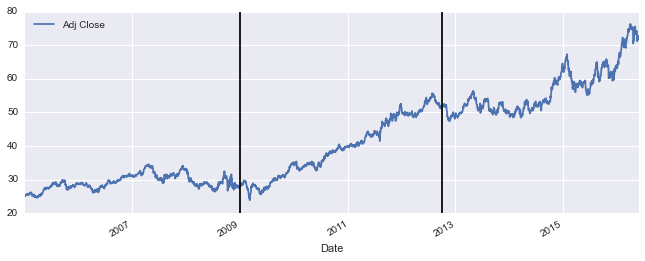

In [4]:
ED['Adj Close'].plot(legend=True,figsize=(11,4))
plt.axvline(x='2008-12-31',color='k')
plt.axvline(x='2012-10-01',color='k')

The above figure shows that overall ED stock price increased nicely over time. And we can see divided the time frame into three periods:

    1) Slowly increasing period: from 2005 to 2008
    2) Steady and fast increasing period: from 2009 to 2012
    3) Fast increasing with ups and downs: from 2013 to present

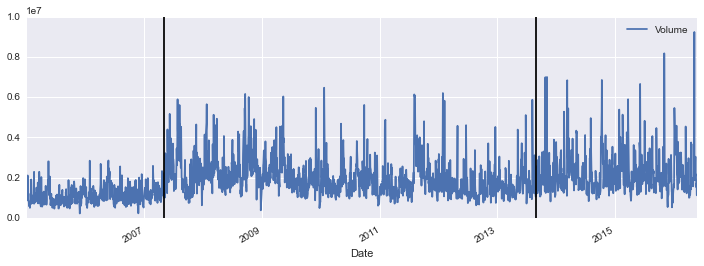

In [5]:
ED['Volume'].plot(legend=True,figsize=(12,4))
plt.axvline(x='2007-05-01',color='k')
plt.axvline(x='2013-09-01',color='k')

The above "Volume verse time" figure shows that we can also divided volume changing into three categories:

    1) Low volume changing peroid: from 2005 to middle 2007
    2) Medium volume changing period: from middle 2007 to late 2013
    3) High volume changing period: from late 2013 to present 

In [6]:
ma_day = [10,20,50]

for ma in ma_day:
    column_name = "MA for %s days" %(str(ma))
    ED[column_name]=pd.rolling_mean(ED['Adj Close'],ma)

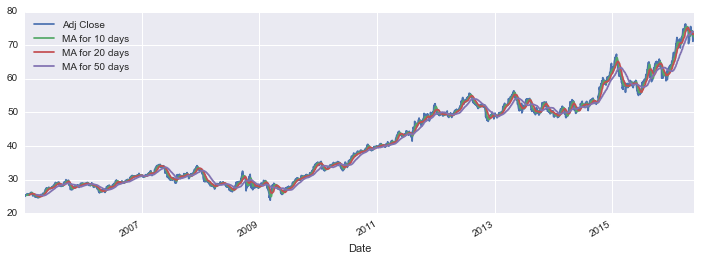

In [7]:
ED[['Adj Close','MA for 10 days','MA for 20 days','MA for 50 days']].plot(subplots=False,figsize=(12,4))

The above figure shows that ED price didn't change much during short period of time.

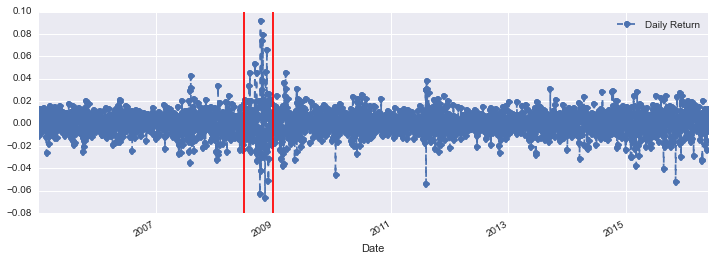

In [8]:
ED['Daily Return'] = ED['Adj Close'].pct_change()

ED['Daily Return'].plot(figsize=(12,4),legend=True,linestyle='--',marker='o')
plt.axvline(x='2008-07-01',color='r')
plt.axvline(x='2008-12-31',color='r')

The above figure shows that daily return did not change much over time, except for a short period time from late 2008 to early 2009.

In [9]:
start = datetime(2005,1,1)
end = datetime(2016,5,28)
df = DataReader(['ED','^GSPC'],'yahoo',start,end)['Adj Close']
df.columns = ['ED','SP500']

In [10]:
df.head()

,ED,SP500
Date,,
2005-01-03,25.371171,1202.079956
2005-01-04,25.294998,1188.050049
2005-01-05,25.019608,1183.739990
2005-01-06,25.048905,1187.890015
2005-01-07,25.119217,1186.189941


In [11]:
df_ret = df.pct_change()

In [12]:
df_ret.head()

,ED,SP500
Date,,
2005-01-03,NaN,NaN
2005-01-04,-0.003002,-0.011671
2005-01-05,-0.010887,-0.003628
2005-01-06,0.001171,0.003506
2005-01-07,0.002807,-0.001431


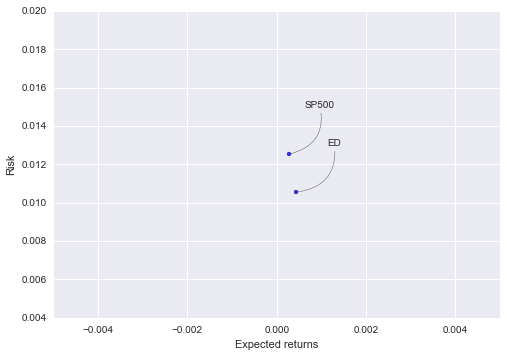

In [13]:
rets =df_ret.dropna()

area = np.pi*5

plt.scatter(rets.mean(), rets.std(),alpha = 0.8,s =area)

plt.xlabel('Expected returns')
plt.ylabel('Risk')

for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(
        label, 
        xy = (x, y), xytext = (45, 45),
        textcoords = 'offset points', ha = 'right', va = 'bottom',
        arrowprops = dict(arrowstyle = '-', connectionstyle = 'arc3,rad=-0.5'))

The above figure shows that ED has relatively a little higher expected returns and lower risk than S&P500 benchmark. And the following numbers show the same conclusion.

In [14]:
rets['ED'].quantile(0.05)

-0.015679651288070046

In [15]:
rets['SP500'].quantile(0.05)

-0.018625126494833916

Overall, history stock data tells us that ED is a stock with low risk and good return. And this part of analysis also showed some pattern. Next part of analysi will focus on company earning report data. I will dig deep to see what could be the reason for stock price/volume changing pattern.

### Part II: Analysis of ED Earning Report Data

In [16]:
ED_er = pd.read_csv('ED_ER.csv',header=True)
ED_er = ED_er.reindex(index=ED_er.index[::-1])

In [17]:
ED_er.head()

,Year,Quarter,TOTAL OPERATING REVENUES,TOTAL OPERATING EXPENSES,OPERATING INCOME,NET INCOME,Net income per common basic share,Net income per common diluted share,DIVIDENDS DECLARED PER COMMON SHARE
55,2005,Q1,2801,2518,283,181,0.75,0.75,0.57
54,2005,Q2,2406,2180,226,115,0.47,0.47,0.57
53,2005,Q3,3375,2956,419,285,1.17,1.16,0.57
52,2005,Q4,3108,2878,230,138,0.56,0.56,0.57
51,2005,Annual,11690,10532,1158,719,2.95,2.94,2.28


In [18]:
ED_er_q = ED_er[ED_er['Quarter']!='Annual']

In [19]:
ED_er_q.head()

,Year,Quarter,TOTAL OPERATING REVENUES,TOTAL OPERATING EXPENSES,OPERATING INCOME,NET INCOME,Net income per common basic share,Net income per common diluted share,DIVIDENDS DECLARED PER COMMON SHARE
55,2005,Q1,2801,2518,283,181,0.75,0.75,0.570
54,2005,Q2,2406,2180,226,115,0.47,0.47,0.570
53,2005,Q3,3375,2956,419,285,1.17,1.16,0.570
52,2005,Q4,3108,2878,230,138,0.56,0.56,0.570
50,2006,Q1,3317,3009,308,181,0.74,0.74,0.575


In [20]:
ED_er_y = ED_er[ED_er['Quarter'] == 'Annual']
ED_er_y = ED_er_y.drop('Quarter', 1)

In [21]:
ED_er_y.head()

,Year,TOTAL OPERATING REVENUES,TOTAL OPERATING EXPENSES,OPERATING INCOME,NET INCOME,Net income per common basic share,Net income per common diluted share,DIVIDENDS DECLARED PER COMMON SHARE
51,2005,11690,10532,1158,719,2.95,2.94,2.28
46,2006,12137,10873,1260,737,2.96,2.95,2.30
41,2007,13120,11725,1395,929,3.48,3.46,2.32
36,2008,13583,12175,1408,1196,3.37,3.36,2.34
31,2009,13032,11257,1774,879,3.16,3.14,2.36


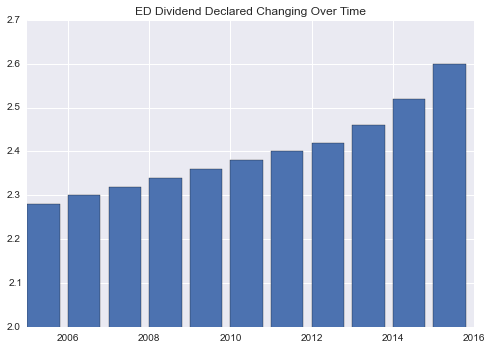

In [22]:
plt.bar(ED_er_y['Year'],ED_er_y['DIVIDENDS DECLARED PER COMMON SHARE'])
plt.xlim([2005,2016])
plt.ylim([2.0,2.7])
plt.title('ED Dividend Declared Changing Over Time')

The above figure shows that the dividend increased nicely over time.

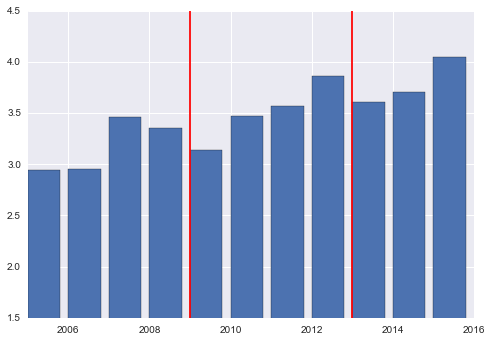

In [23]:
plt.bar(ED_er_y['Year'],ED_er_y['Net income per common diluted share'])
plt.xlim([2005,2016])
plt.ylim([1.5,4.5])
plt.axvline(x='2009',color='r')
plt.axvline(x='2013',color='r')

If I divided the time into three periods showing as the above figure:

    1) Period I: from 2005 to 2008
    2) Period II: from 2009 to 2012
    3) Period III: from 2013 to present
we can see that net income per common diluted share increased over time at each period if we ignore the a little decreasing from 2007 to 2008. And at each transition of period, we can see the obvious decrease.

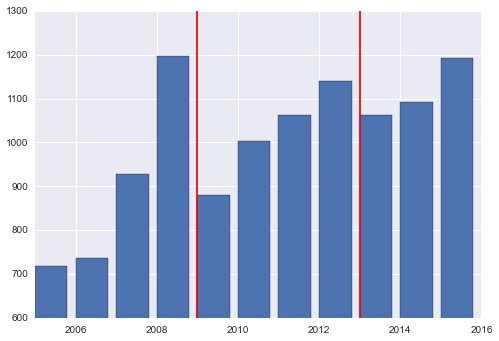

In [24]:
plt.bar(ED_er_y['Year'],ED_er_y['NET INCOME'])
plt.xlim([2005,2016])
plt.ylim([600,1300])
plt.axvline(x='2009',color='r')
plt.axvline(x='2013',color='r')

Again, the above "Net INCOME Over Time" figure showed the pattern I found in "Net income per common diluted share Over Time" figure.

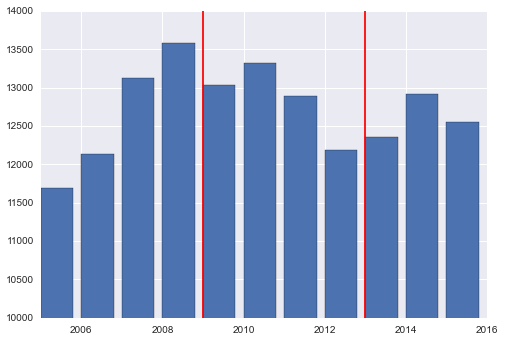

In [25]:
plt.bar(ED_er_y['Year'],ED_er_y['TOTAL OPERATING REVENUES'])
plt.xlim([2005,2016])
plt.ylim([10000,14000])
plt.axvline(x='2009',color='r')
plt.axvline(x='2013',color='r')

The above figure showed that total oerating revenues actually decreased over the three periods.

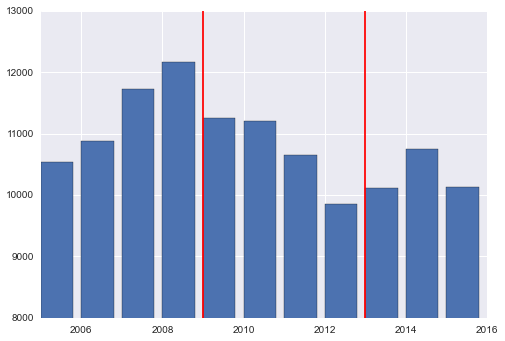

In [26]:
plt.bar(ED_er_y['Year'],ED_er_y['TOTAL OPERATING EXPENSES'])
plt.xlim([2005,2016])
plt.ylim([8000,13000])
plt.axvline(x='2009',color='r')
plt.axvline(x='2013',color='r')

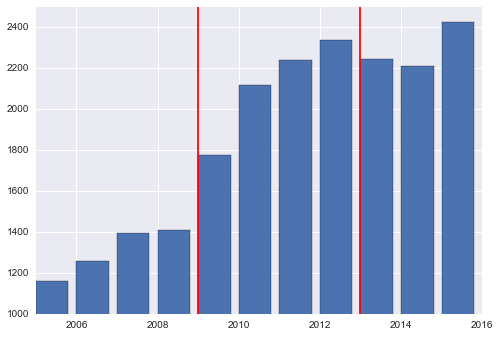

In [27]:
plt.bar(ED_er_y['Year'],ED_er_y['OPERATING INCOME'])
plt.xlim([2005,2016])
plt.ylim([1000,2500])
plt.axvline(x='2009',color='r')
plt.axvline(x='2013',color='r')

The above two figues tell us that **TOTAL OPERATING EXPENSES** is the main reason why we saw the pattern.
    
1) at Period I from 2005 to 2008, we see that total operating expenses increased steadily over time, which contributed the slow growth of OPERATING INCOME over time even with TOTAL OPERATING REVENUES nice increasing over time.

2) at Period II from 2009 to 2012, we see that total operating expenses decreased nicely over time, which contributed the nice growth of OPERATING INCOME over time even with TOTAL OPERATING REVENUES decreasing over time.

3) at Period III from 2013 to present, we see total operating expenses and total operating revenues were at the same direction but slightly the changing of total operating expenses won over the changing of total operating revenues.

**This is an interesting finding!** So, next I dig deeper into quarterly data and see whether data shows a statistically significant difference among different periods.

In [28]:
ED_er_q.head()

,Year,Quarter,TOTAL OPERATING REVENUES,TOTAL OPERATING EXPENSES,OPERATING INCOME,NET INCOME,Net income per common basic share,Net income per common diluted share,DIVIDENDS DECLARED PER COMMON SHARE
55,2005,Q1,2801,2518,283,181,0.75,0.75,0.570
54,2005,Q2,2406,2180,226,115,0.47,0.47,0.570
53,2005,Q3,3375,2956,419,285,1.17,1.16,0.570
52,2005,Q4,3108,2878,230,138,0.56,0.56,0.570
50,2006,Q1,3317,3009,308,181,0.74,0.74,0.575


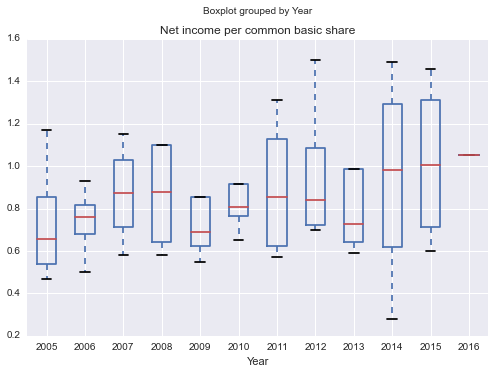

In [29]:
ED_er_q.boxplot('Net income per common basic share',by='Year')

In [30]:
y_1 = ED_er_q['Net income per common basic share'][ED_er_q['Year'].isin([2013,2014,2015,2016])]
y_2 = ED_er_q['Net income per common basic share'][ED_er_q['Year'].isin([2009,2010,2011,2012])]
y_3 = ED_er_q['Net income per common basic share'][ED_er_q['Year'].isin([2005,2006,2007,2008])]

In [31]:
F, p = stats.f_oneway(y_1,y_2,y_3)

In [32]:
print(F,p)

(0.89702850313657101, 0.41544767418103101)


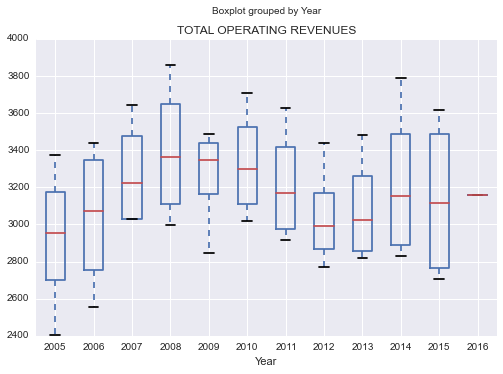

In [33]:
ED_er_q.boxplot('TOTAL OPERATING REVENUES',by='Year')

In [34]:
y_1 = ED_er_q['TOTAL OPERATING REVENUES'][ED_er_q['Year'].isin([2013,2014,2015,2016])]
y_2 = ED_er_q['TOTAL OPERATING REVENUES'][ED_er_q['Year'].isin([2009,2010,2011,2012])]
y_3 = ED_er_q['TOTAL OPERATING REVENUES'][ED_er_q['Year'].isin([2005,2006,2007,2008])]
F, p = stats.f_oneway(y_1,y_2,y_3)
print(F,p)

(0.14486287042167878, 0.86557131737720283)


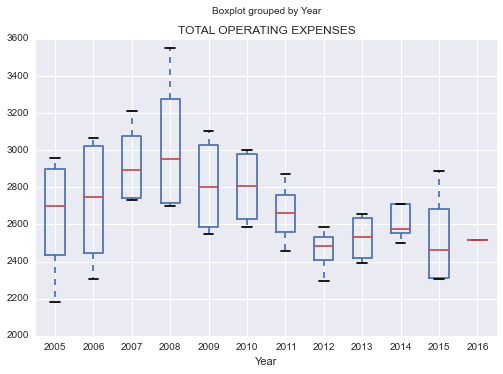

In [35]:
ED_er_q.boxplot('TOTAL OPERATING EXPENSES',by='Year')

In [36]:
y_1 = ED_er_q['TOTAL OPERATING EXPENSES'][ED_er_q['Year'].isin([2013,2014,2015,2016])]
y_2 = ED_er_q['TOTAL OPERATING EXPENSES'][ED_er_q['Year'].isin([2009,2010,2011,2012])]
y_3 = ED_er_q['TOTAL OPERATING EXPENSES'][ED_er_q['Year'].isin([2005,2006,2007,2008])]
F, p = stats.f_oneway(y_1,y_2,y_3)
print(F,p)

(2.9664568447446062, 0.062362667822908092)


In [37]:
stats.ttest_ind(y_1,y_2)

(-1.2513357665363074, 0.2215459193930655)

In [38]:
stats.ttest_ind(y_1,y_3)

(-2.2332954275691699, 0.034012898403855026)

In [39]:
stats.ttest_ind(y_3,y_2)

(1.3627246307120415, 0.1831119727300341)

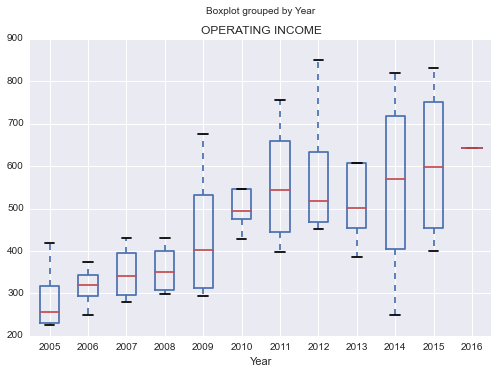

In [40]:
ED_er_q.boxplot('OPERATING INCOME',by='Year')

In [41]:
y_1 = ED_er_q['OPERATING INCOME'][ED_er_q['Year'].isin([2013,2014,2015,2016])]
y_2 = ED_er_q['OPERATING INCOME'][ED_er_q['Year'].isin([2009,2010,2011,2012])]
y_3 = ED_er_q['OPERATING INCOME'][ED_er_q['Year'].isin([2005,2006,2007,2008])]
F, p = stats.f_oneway(y_1,y_2,y_3)
print(F,p)

(12.636639510276213, 5.0528984717311369e-05)


In [42]:
stats.ttest_ind(y_1,y_2)

(0.75748353624426989, 0.45532070473807607)

In [43]:
stats.ttest_ind(y_1,y_3)

(4.824274616422219, 4.8842708488948679e-05)

In [44]:
stats.ttest_ind(y_3,y_2)

(-4.7398785268127464, 4.8518405234373955e-05)

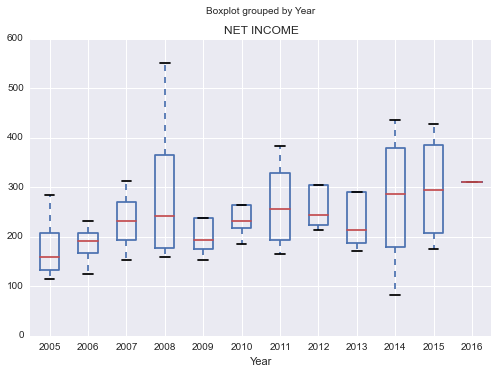

In [45]:
ED_er_q.boxplot('NET INCOME',by='Year')

In [46]:
y_1 = ED_er_q['NET INCOME'][ED_er_q['Year'].isin([2013,2014,2015,2016])]
y_2 = ED_er_q['NET INCOME'][ED_er_q['Year'].isin([2009,2010,2011,2012])]
y_3 = ED_er_q['NET INCOME'][ED_er_q['Year'].isin([2005,2006,2007,2008])]
F, p = stats.f_oneway(y_1,y_2,y_3)
print(F,p)

(1.1113790531983829, 0.33858893818720703)


For this part of analysis, I noticed that the quarter data changing even at the same year is big. However, I did see there are statistically significant differences between different periods for some attributes. For example, **Operating Income quarter data** shows a statistically significant difference between Period I (from 2005 to 2008) and Period II (from 2009 to 2012),and between Period I and Period III (from 2013 to present). **TOTAL OPERATING EXPENSES quarter data** shows a statistically significant difference between Period I and Period III. These results encourged me to conclude that there is a **pattern** and **TOTAL OPERATING EXPENSES** data is the main driving force.

### Part III: Monte Carlo simulation 

In [47]:
def get_price(days,mu,sigma,price_start):
    """A function for getting stock price after days by simulation.
    
    input:
        days: the number of days for simulation
        mu: the mean of history stock prices
        sigma: the standard deviation of history stock prices
        price_start: the stock price for starting the simulation
    
    output:
        the stock price in days
    """
    p = np.random.normal(mu,sigma,days)
    Price = [price_start]
    for i in range(days-1):
        price = Price[i]*(1+p[i+1])
        Price.append(price)
    return(Price[days-1])

In [48]:
df['ED'].tail(1)

Date
2016-05-27    72.739998
Name: ED, dtype: float64

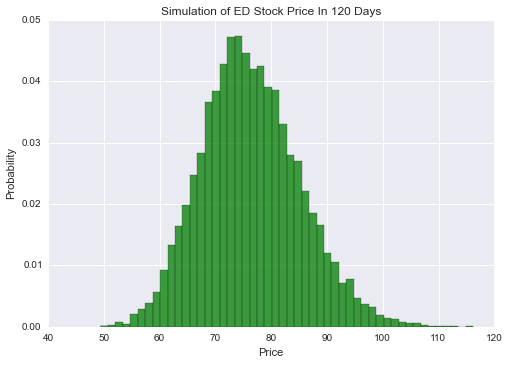

In [49]:
mu = rets.mean()['ED']
sigma = rets.std()['ED']
start_price = 72.74

n=10000
result = []

for i in range(n):
    price = get_price(120,mu,sigma,start_price)
    result.append(price)

n, bins, patches = plt.hist(result, 50, normed=1, facecolor='green', alpha=0.75)
plt.xlabel('Price')
plt.ylabel('Probability')
plt.title('Simulation of ED Stock Price In 120 Days')

In [50]:
final_result = round(np.percentile(result, 1),1)
print('The VaR with 99% confidence is ${}').format(final_result)

The VaR with 99% confidence is $57.7


Based on the simulation by using all stock price data from 2005 to present, I got The VaR with 99% confidence is around $58 in next 120 trade days.

## Discussion

Based on the history stock price, ED is a good stock with low risk and nice return.

For the whole time frame from 2005 to present, it can be separated into three periods:
 
1) At period I (from 2005 to 2008), company operated on high expenses and generated high revenues;

2) At period II (from 2009 to 2012), company started to cut down expenses and got good net incomes even with low revenues.

3) At period III (from 2013 to present), company started to increase the expenses but overall still operated on relatively lower expenses.

**We can see company got big benefit from lowering expenses.** However, we have to keep in mind that **total revenues** is another key attribute. From the number of total revenues, we can see that Consolidated Edison hasn't recovered from 2008 crisis. Simple Monte Carlo simulation also shows that the stock price could go down a lot or we may not get the return as we are looking for.

Back to the question at beginning: Is now the right time to invest in ED?
My anwer is **Yes if you are not looking for big return.**